# Step 1. Exploring the data 
    duplicate data doesnt exist 
    missing values do exist, need to be dealt with according to their data type


In [203]:
# Add data description
print("Project: Loan Approval Prediction")
print("Target Variable: Loan_Status")
print("Data Source: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download")

# Add basic data dictionary
data_dict = {
    'Loan_ID': 'Unique loan identifier',
    'Gender': 'Applicant gender',
    'Married': 'Marital status',
    # ... etc
}

Project: Loan Approval Prediction
Target Variable: Loan_Status
Data Source: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download


In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Load Data ---
train_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/train.csv")
test_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/test.csv")

# --- 3. Initial Inspection ---
train_df.head()
train_df.info()
print(train_df.describe())
print(train_df.isna().sum())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.00

Visualising target varibale distribution - Loan Status  

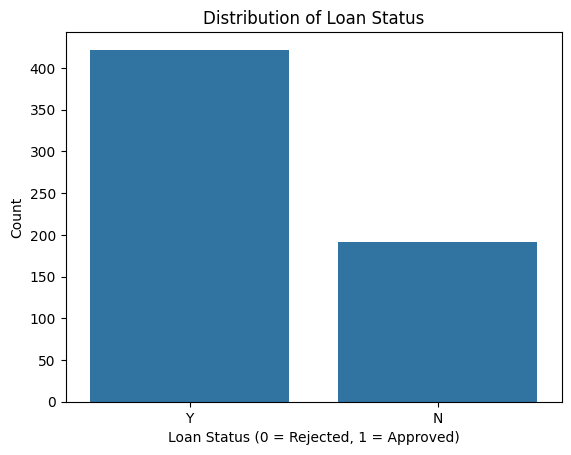

Loan Approval Rate: 31.3%


C:\Users\livmo\AppData\Local\Temp\ipykernel_19216\2639262914.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Loan Approval Rate: {(train_df['Loan_Status'].value_counts(normalize=True)[1]*100):.1f}%")


In [205]:
# Count the number of approvals vs rejections
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.show()

# --- Visualize target variable distribution
train_df['Loan_Status'].value_counts(normalize=True)

print(f"Loan Approval Rate: {(train_df['Loan_Status'].value_counts(normalize=True)[1]*100):.1f}%")


Mean and Varience of applicants income and Co aplicants income.

In [206]:
import statistics

app_income_mean = statistics.mean(train_df['ApplicantIncome'])
app_income_varience = statistics.variance(train_df['ApplicantIncome'])

count_highApplicants = 0
count_lowApplicants = 0

for x in range(len(train_df)):
    if (train_df.loc[x, 'ApplicantIncome'] > app_income_mean):
        if (train_df.loc[x, 'Loan_Status'] == 1):
            count_highApplicants += 1
    x += 1

for x in range(len(train_df)):
    if (train_df.loc[x, 'ApplicantIncome'] < app_income_mean) and  (train_df.loc[x, 'Loan_Status'] == 1):
        count_lowApplicants += 1


co_app_income_mean = statistics.mean(train_df['CoapplicantIncome'])
co_app_income_varience = statistics.variance(train_df['CoapplicantIncome'])

print("Applicant Income: \n \tMean:",app_income_mean, "\n\tVariance:", app_income_varience)
print("Coapplicant Income: \n\tMean:",co_app_income_mean, "\n\tVariance:", co_app_income_varience)

print("\nNumber Applicatants OVER mean to recieve loan: ", count_highApplicants)
print("Number Applicatants UNDER mean to recieve loan: ", count_lowApplicants)

Applicant Income: 
 	Mean: 5403.459283387622 
	Variance: 37320390.167181216
Coapplicant Income: 
	Mean: 1621.245798027101 
	Variance: 8562929.518387223

Number Applicatants OVER mean to recieve loan:  0
Number Applicatants UNDER mean to recieve loan:  0


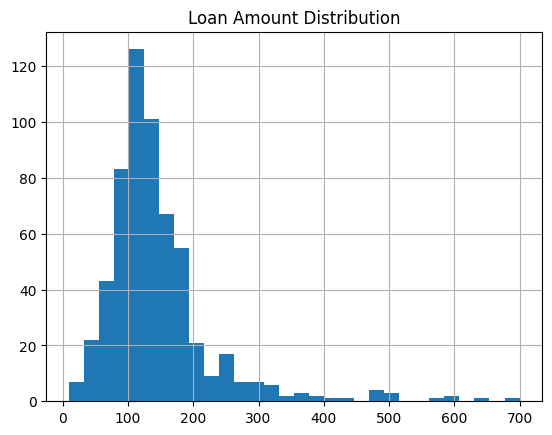

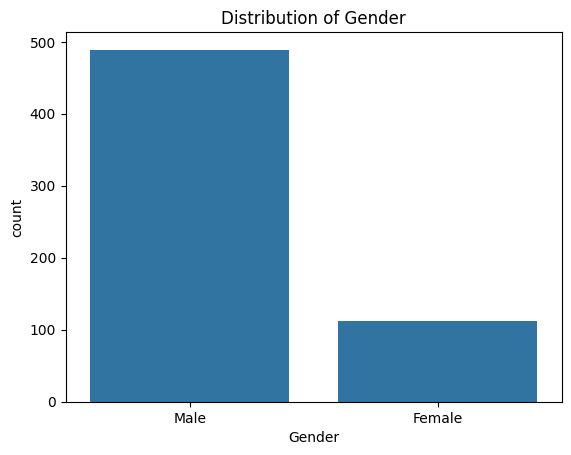

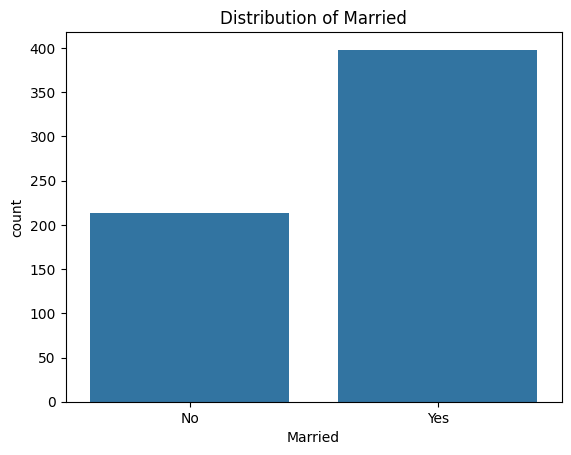

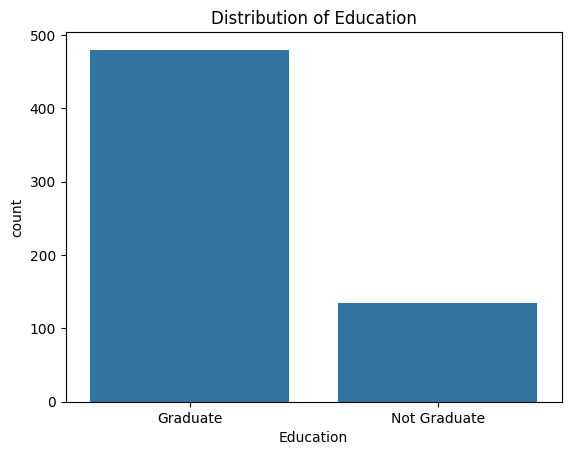

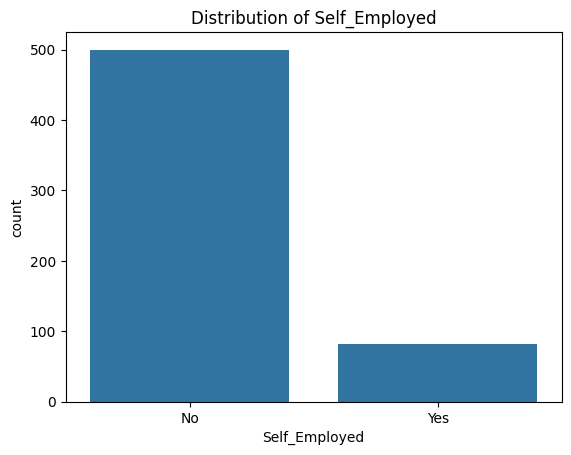

In [207]:
# Numerical variables
train_df['LoanAmount'].hist(bins=30)
plt.title("Loan Amount Distribution")
plt.show()


# Categorical variables distribution example
for col in ['Gender', 'Married', 'Education', 'Self_Employed']:
    sns.countplot(x=col, data=train_df)
    plt.title(f"Distribution of {col}")
    plt.show()


# Step 2. Cleaning the Data
    Ensure Correct, Clean data 
    All Catagorical data binary mapped to have represented in 1s, 0s

In [208]:
# --- Handle Missing Values ---
# Categorical
 
for col in ["Gender", "Married", "Self_Employed"]:
    if col in  train_df.columns:
        mode_val =  train_df[col].mode()
        train_df[col] =  train_df[col].fillna(mode_val.iloc[0])
        # Also replace None with mode
        train_df[col] =  train_df[col].replace({None: mode_val.iloc[0]})
    else:
        # If no mode exists, use a sensible default
        if col == 'Gender':
            train_df[col] =  train_df[col].fillna('Male')
        elif col in ['Married', 'Self_Employed', 'Loan_Status']:
            train_df[col] =  train_df[col].fillna('No')
# Numerical
for col in ['LoanAmount', 'Loan_Amount_Term']:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

# Credit History
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

print("EDA and Cleaning Complete!")

EDA and Cleaning Complete!


Mending Columns to:
 Drop Irrelevant Columns
 Encode Cataegorical Values


In [209]:
columns_drop = ['Loan_ID']
    

train_df = train_df.drop(columns = [col for col in columns_drop if col in train_df.columns])


binary_cols = ['Married', 'Self_Employed', 'Gender', 'Loan_Status']

# 4. Encode categorical variables
# Expanded binary mappings to handle case variations
binary_map = {
    'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Y': 1, 'N': 0,
    'yes': 1, 'no': 0, 'male': 1, 'female': 0, 'y': 1, 'n': 0
}

for col in binary_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].map(binary_map)
        # Check what happened after mapping
        print(f"After mapping - {col}: {train_df[col].unique()}")
        print(f"NaN count in {col}: {train_df[col].isna().sum()}")

# Dependents: convert '3+' to 3 and fill missing with 0
if 'Dependents' in train_df.columns:
    train_df['Dependents'] = train_df['Dependents'].replace('3+', 3).astype(float)
    train_df['Dependents'] = train_df['Dependents'].fillna(0)


# Education: binary encoding Graduate=1, Not Graduate=0
if 'Education' in train_df.columns:
    train_df['Education'] = train_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# Property_Area: map Urban=1, Semiurban/Rural=0
if 'Property_Area' in train_df.columns:
    train_df['Property_Area'] = train_df['Property_Area'].map(lambda x: 1 if x == 1 else 0)

After mapping - Married: [0 1]
NaN count in Married: 0
After mapping - Self_Employed: [0 1]
NaN count in Self_Employed: 0
After mapping - Gender: [1 0]
NaN count in Gender: 0
After mapping - Loan_Status: [1 0]
NaN count in Loan_Status: 0


# Step 3. Feature Engineering


Ensure Correct, Clean Data  

In [210]:
train_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/processed/df_train_clean.csv")

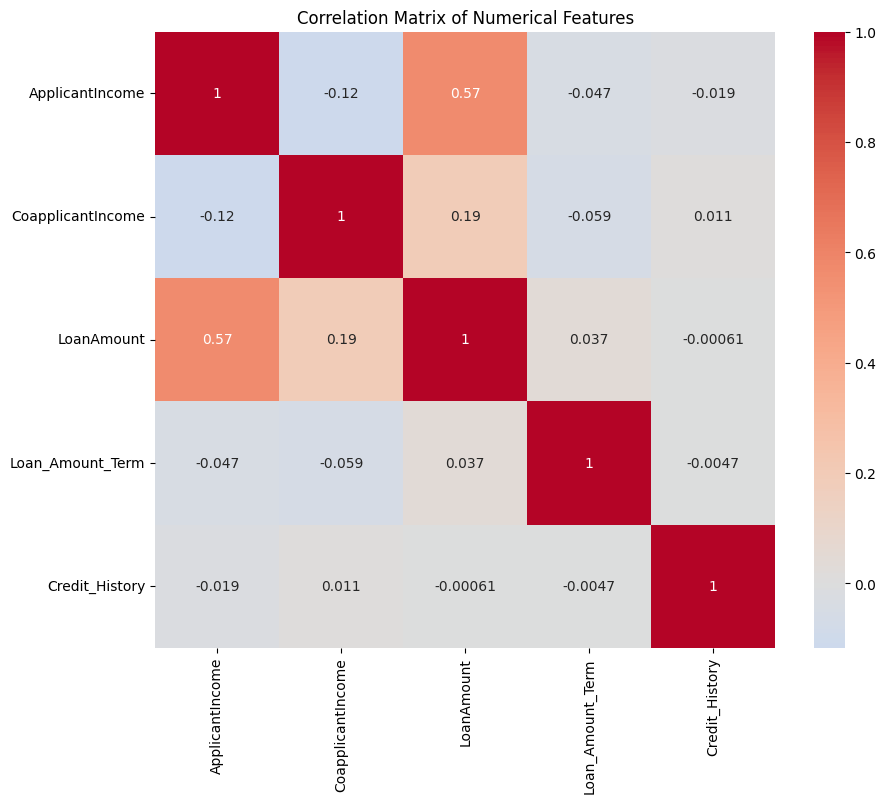

In [211]:
# Numerical features correlation
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [212]:
# Convert target to numerical for correlation
df_numeric = train_df.copy()
df_numeric['Loan_Status'] = df_numeric['Loan_Status']
# Correlation with target
target_correlations = df_numeric[numerical_features + ['Loan_Status']].corr()['Loan_Status'].sort_values(ascending=False)

print("Correlation with Loan Status:")
print(target_correlations)

Correlation with Loan Status:
Loan_Status          1.000000
Credit_History       0.540556
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64


In [213]:
from scipy.stats import pearsonr

def correlation_significance(df, feature1, feature2):
    # Remove missing values
    clean_data = df[[feature1, feature2]].dropna()
    
    if len(clean_data) < 2:
        return None, None
    
    corr, p_value = pearsonr(clean_data[feature1], clean_data[feature2])
    return corr, p_value

# Test specific relationships
relationships = [
    ('ApplicantIncome', 'LoanAmount'), 
    ('Credit_History', 'LoanAmount'),
    ('ApplicantIncome', 'CoapplicantIncome'),
    ('CoapplicantIncome', 'LoanAmount'),
    ('LoanAmount', 'Loan_Amount_Term'),
    ('ApplicantIncome', 'Credit_History')
]

print("Correlation Analysis with Statistical Significance:")
print("=" * 60)

for feat1, feat2 in relationships:
    corr, p_value = correlation_significance(train_df, feat1, feat2)
    
    if corr is not None:
        # Determine significance level
        if p_value < 0.001:
            significance = "***"  # Highly significant
        elif p_value < 0.01:
            significance = "**"   # Very significant
        elif p_value < 0.05:
            significance = "*"    # Significant
        else:
            significance = "ns"   # Not significant
        
        # Interpret correlation strength
        if abs(corr) >= 0.7:
            strength = "Very Strong"
        elif abs(corr) >= 0.5:
            strength = "Strong"
        elif abs(corr) >= 0.3:
            strength = "Moderate"
        elif abs(corr) >= 0.1:
            strength = "Weak"
        else:
            strength = "Very Weak"
        
        # Determine direction
        direction = "Positive" if corr > 0 else "Negative"
        
        print(f"{feat1} vs {feat2}:")
        print(f"  Correlation (r): {corr:.4f}")
        print(f"  p-value: {p_value:.4f} {significance}")
        print(f"  Strength: {strength} {direction}")
        print(f"  Samples used: {len(train_df[[feat1, feat2]].dropna())}")
        print("-" * 40)
    else:
        print(f"{feat1} vs {feat2}: Insufficient data for analysis")
        print("-" * 40)

# Additional: Correlation with target variable (if you have Loan_Status as numeric)
print("\n" + "=" * 60)
print("CORRELATION WITH TARGET VARIABLE (Loan_Status)")
print("=" * 60)

# Convert Loan_Status to numeric for correlation analysis
df_numeric = train_df.copy()
df_numeric['Loan_Status'] = df_numeric['Loan_Status'].map({'Y': 1, 'N': 0})

target_relationships = [
    ('ApplicantIncome', 'Loan_Status'),
    ('CoapplicantIncome', 'Loan_Status'),
    ('LoanAmount', 'Loan_Status'),
    ('Credit_History', 'Loan_Status'),
    ('Loan_Amount_Term', 'Loan_Status')
]

for feat, target in target_relationships:
    corr, p_value = correlation_significance(df_numeric, feat, target)
    
    if corr is not None:
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        
        print(f"{feat} vs Loan_Status: r = {corr:.4f}, p = {p_value:.4f} {significance}")

Correlation Analysis with Statistical Significance:
ApplicantIncome vs LoanAmount:
  Correlation (r): 0.5652
  p-value: 0.0000 ***
  Strength: Strong Positive
  Samples used: 614
----------------------------------------
Credit_History vs LoanAmount:
  Correlation (r): -0.0006
  p-value: 0.9880 ns
  Strength: Very Weak Negative
  Samples used: 614
----------------------------------------
ApplicantIncome vs CoapplicantIncome:
  Correlation (r): -0.1166
  p-value: 0.0038 **
  Strength: Weak Negative
  Samples used: 614
----------------------------------------
CoapplicantIncome vs LoanAmount:
  Correlation (r): 0.1892
  p-value: 0.0000 ***
  Strength: Weak Positive
  Samples used: 614
----------------------------------------
LoanAmount vs Loan_Amount_Term:
  Correlation (r): 0.0370
  p-value: 0.3606 ns
  Strength: Very Weak Positive
  Samples used: 614
----------------------------------------
ApplicantIncome vs Credit_History:
  Correlation (r): -0.0186
  p-value: 0.6452 ns
  Strength: Ver

Correlation Analysis
1. Loan_Amount_Term vs LoanAmount 
 Weak positive
 Larger loans might have longer terms, but not strongly correlated
 Loan_Amount_Term vs Income: Very weak
 Loan term preference varies by individual, not strongly income-dependent


2. Aplicants vs Loan Amount 
 Expected: Moderate to strong POSITIVE correlation (r = 0.4-0.7)
 Interpretation: Higher income applicants tend to request larger loans
 Business logic: People with higher incomes can afford larger loan payments

3. CoapplicantIncome vs LoanAmount
 Expected: Weak to moderate POSITIVE correlation (r = 0.2-0.5)
 Interpretation: Additional household income supports larger loan requests
 Business logic: Combined income increases borrowing capacity


4. ApplicantIncome vs CoapplicantIncome
 Expected: Very weak or NEGATIVE correlation (r = -0.2 to 0.2)
 Interpretation: These incomes are often independent
 Business logic: One spouse working might mean the other doesn't (negative correlation)
 Or no relationship if both work independently


5. Credit_History vs Other Features
 Credit_History vs LoanAmount: Weak correlation
 People with good credit might request larger OR smaller loans
 Credit_History vs Income: Weak correlation  
 Credit history doesn't necessarily correlate with income level

In [214]:
# After running correlation with target (Loan_Status):
expected_target_correlations = {
    'Credit_History': 'HIGH (0.3-0.6) - Strong predictor of approval',
    'ApplicantIncome': 'LOW-MODERATE (0.1-0.3) - Some predictive power', 
    'CoapplicantIncome': 'LOW (0.0-0.2) - Weak predictor',
    'LoanAmount': 'LOW (0.0-0.2) - Weak direct relationship',
    'Loan_Amount_Term': 'VERY LOW (near 0) - Little predictive value'
}

In [215]:
# Watch for high correlations between FEATURES (not with target)
multicollinearity_risks = {
    ('ApplicantIncome', 'CoapplicantIncome'): 'If r > 0.7, potential issue',
    ('ApplicantIncome', 'LoanAmount'): 'If r > 0.8, might need feature engineering'
}